# Tapir sound analysis

In [ ]:
from scipy.io import wavfile
import scipy.io
from scipy import signal
from scipy.fft import fftshift, fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
import tftb



'audio_file_path = \'0001_Tapir.wav\'\nsamplerate, data = wavfile.read(audio_file_path)\n\nprint(f"number of channels = {data.shape[1]}")\nprint("samplerate=",samplerate)\n\nlength = data.shape[0] / samplerate\nprint(f"length = {length}s")'

In [ ]:
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:])

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

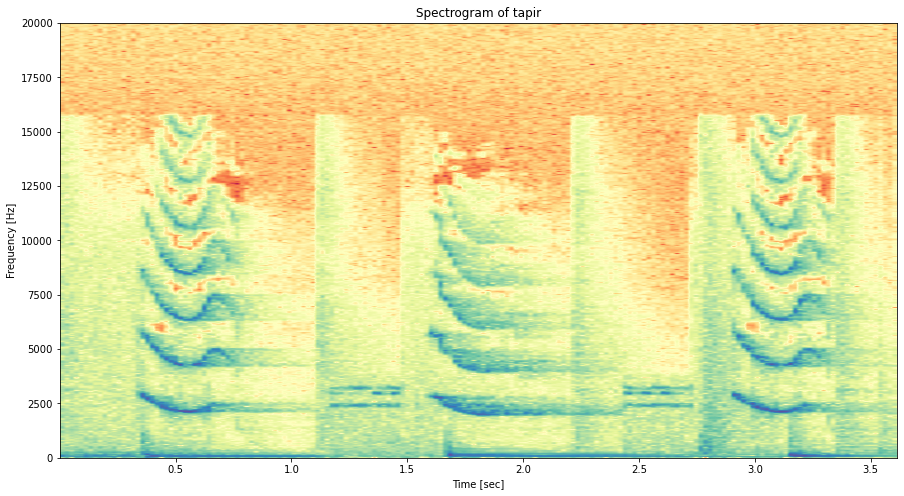

In [5]:
NFFT=1028

plt.figure(figsize=(15,8))
plt.specgram(data[:, 0], Fs=samplerate, cmap="Spectral", NFFT=NFFT)
plt.title('Spectrogram of tapir')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 20000])
plt.show()
plt.show()

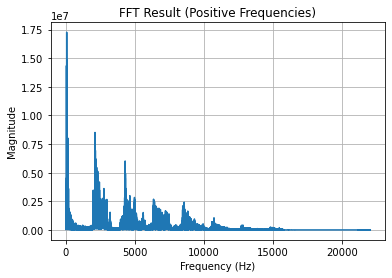

In [6]:
fft_result = fft(data[:,0])
fs=samplerate
# Get the frequencies associated with the FFT result
frequencies = fftfreq(len(fft_result), 1/fs)

# Only consider positive frequencies ([:N//2])
positive_frequencies = frequencies[:len(frequencies)//2]

# Plot the positive frequencies
plt.plot(positive_frequencies, np.abs(fft_result[:len(frequencies)//2]))
plt.title('FFT Result (Positive Frequencies)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

22049.724002403244


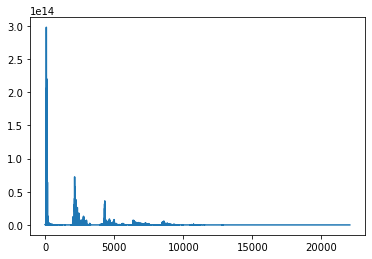

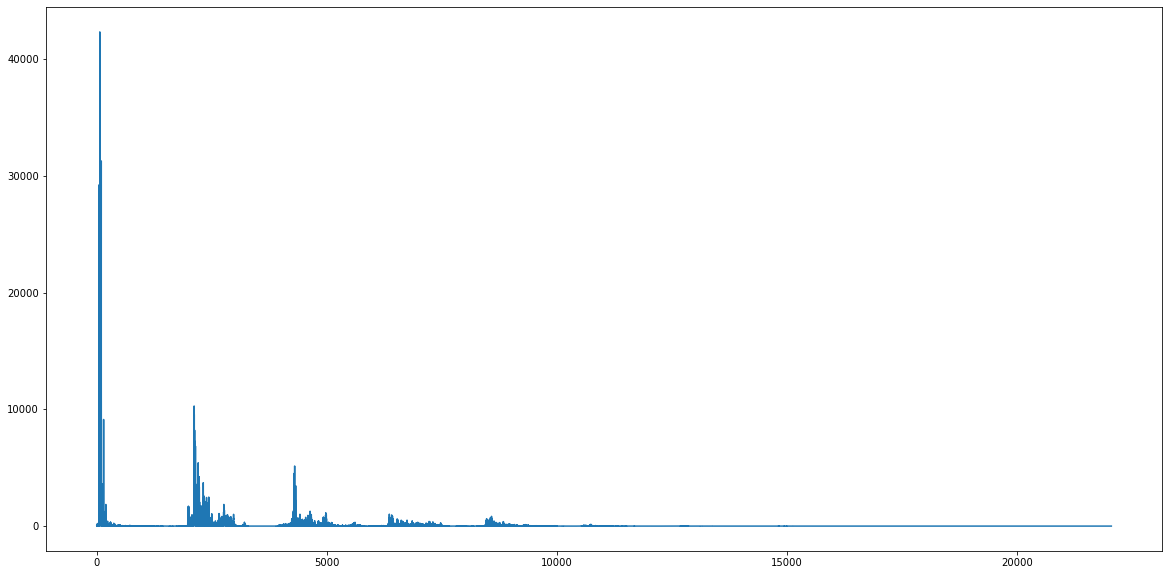

In [7]:
ps = (np.abs(np.fft.fft(data[:,0]))**2)

freqs = np.fft.fftfreq(data[:,0].shape[0], 1/samplerate)
idx = np.argsort(freqs)

#plt.plot(freqs[idx][:len(freqs)//2], ps[idx][:len(freqs)//2])

plt.figure()
plt.plot(freqs[:len(freqs)//2], ps[:len(freqs)//2])

plt.figure(figsize=(20,10))
#time = np.linspace(0., length, data.shape[0])
N=length*samplerate
normalization = ps/(N* samplerate)
plt.plot(freqs[:len(freqs)//2], normalization[:len(freqs)//2])

print(max(freqs))

In [11]:
def spectrogram(data,samplerate) :
    NFFT=1028
    #plt.figure(figsize=(15,8))
    #plt.figure(figsize=(9, 5))
    plt.specgram(data, Fs=samplerate, cmap="jet", NFFT=NFFT)
    plt.title('Spectrogram of tapir')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar()
    #plt.ylim([0, 20000])
    #plt.show()

In [4]:
def read_audio(audio) :
    audio_file_path = audio
    samplerate, data = wavfile.read(audio_file_path)
    length = data.shape[0] / samplerate
    return samplerate,data,length

In [5]:
def signal_show(data,samplerate):
    length = data.shape[0] / samplerate
    time = np.linspace(0., length, data.shape[0])
    plt.plot(time, data)

    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    #plt.show()

In [6]:
def signal_segmentation(data,new_length,samplerate):
    new_data_sample = int(new_length * samplerate)
    new_data=data[:new_data_sample+1]
    return new_data

In [7]:
def downsampling(data,samplerate,new_samplerate):
    length = data.shape[0] / samplerate
    new_sample=int(new_samplerate*length)
    new_data = signal.resample(data, new_sample)
    return new_data



In [8]:
def dft(data,samplerate):
    fs=samplerate
    yf = fft(data[:,0])
    N= len(yf)
    xf = fftfreq(N, 1/fs)[:N//2]
    plt.plot(xf[:20000], 2.0/N * np.abs(yf[0:N//2])[:20000])
    plt.title('FFT Result (Positive Frequencies)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    #plt.show()

In [9]:
def PSD(data,samplerate):
    length = data.shape[0] / samplerate
    freqs = np.fft.fftfreq(data.shape[0], 1/samplerate)
    N=len(freqs)
    #idx = np.argsort(freqs)
    fft=np.fft.fft(data)
    ps = (np.abs(np.fft.fft(data))**2)
    N=length*samplerate
    normalization = ps/(N* samplerate)
    plt.plot(freqs[:len(freqs)//2], normalization[:len(freqs)//2])
    #plt.figure()
    #plt.plot(freqs[0:N//2][:60000], ps[0:N//2][:60000])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Power spectrum (np.fft.fft)')
    plt.grid()
    #return freqs,ps

In [11]:
def WVD2(data,samplerate):
    sample=data.shape[0]
    ts = np.arange(sample) * (1/samplerate)  # times
    dt= (1/samplerate)

    wvd = tftb.processing.WignerVilleDistribution(data, timestamps=ts)
    tfr_wvd, t_wvd, f_wvd = wvd.run()

    f_wvd = np.fft.fftfreq(tfr_wvd.shape[0], d=2 * dt)
    df_wvd = f_wvd[1]-f_wvd[0]  # the frequency step in the WVT

    for i, value in enumerate(f_wvd):
        if value >= 0:
            first_positive_index = i
            break

    for i, value in enumerate(f_wvd):
        if value < 0:
            first_negative_index = i
            break
            
    im = plt.imshow(tfr_wvd[first_positive_index:first_negative_index], aspect='auto', origin='lower',
           extent=(ts[0] - dt/2, ts[-1] + dt/2,
                   f_wvd[first_positive_index]-df_wvd/2, f_wvd[first_negative_index-1]+df_wvd/2),cmap="Spectral",
                    vmin = np.min(tfr_wvd[tfr_wvd>=0] ), vmax = np.max(tfr_wvd[tfr_wvd>=0]) )

    plt.xlabel('time [s]')
    plt.ylabel('frequency [Hz]')

    cbar = plt.colorbar(im)
    im.set_clim(np.min(tfr_wvd[tfr_wvd>=0]), np.max(tfr_wvd[tfr_wvd>=0]))
    plt.title('Wigner-Ville Transform')
    plt.show()

In [12]:
def WVD(data,samplerate):
    sample=data.shape[0]
    ts = np.arange(sample) * (1/samplerate)  # times
    dt= (1/samplerate)

    wvd = tftb.processing.WignerVilleDistribution(data, timestamps=ts)
    tfr_wvd, t_wvd, f_wvd = wvd.run()

    f_wvd = np.fft.fftfreq(tfr_wvd.shape[0], d=2 * dt)
    df_wvd = f_wvd[1]-f_wvd[0]  # the frequency step in the WVT

    for i, value in enumerate(f_wvd):
        if value >= 0:
            first_positive_index = i
            break

    for i, value in enumerate(f_wvd):
        if value < 0:
            first_negative_index = i
            break
    ################## turn negative value to zero ######################################
    zero_np_tfr=np_arr = np.array(tfr_wvd)
    zero_np_tfr[zero_np_tfr < 0] = 0
    #####################################################################################
    
    tfr_pos_freq = zero_np_tfr[first_positive_index:first_negative_index,:]
    
    plt.figure(figsize=(9, 5))
    
    im = plt.imshow( tfr_pos_freq, aspect='auto', origin='lower',
           extent=(ts[0] - dt/2, ts[-1] + dt/2,
                   f_wvd[first_positive_index]-df_wvd/2, (f_wvd[first_negative_index-1]+df_wvd/2)*2),cmap="jet",
                    vmin = np.min(tfr_pos_freq), vmax = np.max(tfr_pos_freq) )

    plt.xlabel('time [s]')
    plt.ylabel('frequency [Hz]')

    cbar = plt.colorbar(im)
    #im.set_clim(np.min(tfr_wvd[tfr_wvd>=0]), np.max(tfr_wvd[tfr_wvd>=0]))
    plt.title('Wigner-Ville Transform')
    plt.show()
    

In [12]:
def PWVD(data,samplerate):
    
    new_sample=data.shape[0]
    ts = np.arange(new_sample) * (1/samplerate)  # times
    dt= (1/samplerate)
    
    wvd=tftb.processing.PseudoWignerVilleDistribution(new_data,timestamps=ts)
    tfr_wvd, t_wvd, f_wvd = wvd.run()
    #wvd.plot(cmap="Spectral")
    
    ################################

    f_wvd = np.fft.fftfreq(tfr_wvd.shape[0], d=2 * dt)
    df_wvd = f_wvd[1]-f_wvd[0]  # the frequency step in the WVT

    for i, value in enumerate(f_wvd):
        if value >= 0:
            first_positive_index = i
            break

    for i, value in enumerate(f_wvd):
        if value < 0:
            first_negative_index = i
            break
            
    #plt.figure(figsize=(20,5))
    im = plt.imshow(tfr_wvd[first_positive_index:first_negative_index-1], aspect='auto', origin='lower',
           extent=(ts[0] - dt/2, ts[-1] + dt/2,
                   f_wvd[first_positive_index]-df_wvd/2, f_wvd[first_negative_index-1]+df_wvd/2),
                   vmin = np.min(tfr_wvd[tfr_wvd>=0]) , vmax = np.max(tfr_wvd[tfr_wvd>=0]) )

    plt.xlabel('time [s]')
    plt.ylabel('frequency [Hz]')
    cbar = plt.colorbar(im)
    #im.set_clim(np.min(tfr_wvd[tfr_wvd>=0]), np.max(tfr_wvd[tfr_wvd>=0]))
    #cbar.set_clim(np.min(tfr_wvd[first_positive_index:]), np.max(tfr_wvd[first_positive_index:]))
    plt.title('Psuedo Wigner-Ville Transform')
    #plt.show()

In [12]:
def PWVD2(data,sampling,length):
    #down sampling
    new_data = signal.resample(data[:,0], sampling)
    ts=np.linspace(0,length,sampling)
    wvd=tftb.processing.PseudoWignerVilleDistribution(new_data,timestamps=ts)
    wvd.run()
    wvd.plot(cmap="Spectral")
    
    

In [13]:
def SPWVD(data,downsampling,length):
    #down sampling
    new_data = signal.resample(data[:,0], downsampling)
    ts=np.linspace(0,length,downsampling)
    wvd=tftb.processing.smoothed_pseudo_wigner_ville(new_data,freq_bins = 512,timestamps=ts)
    
    
    threshold = np.amax(np.abs(wvd)**2) * 0.05
    wvd[np.abs(wvd)**2 <= threshold] = 0.0
    plt.imshow(np.abs(wvd)**2,
           extent=[0, length, 0, 0.5],
           aspect='auto',
           origin='lower')
    plt.set_cmap("Spectral")
    plt.grid(True)
    plt.title("Smoothed Pseudo WV distribution")
    plt.xlabel('Time')
    plt.ylabel('Normalized Frequencies')
    

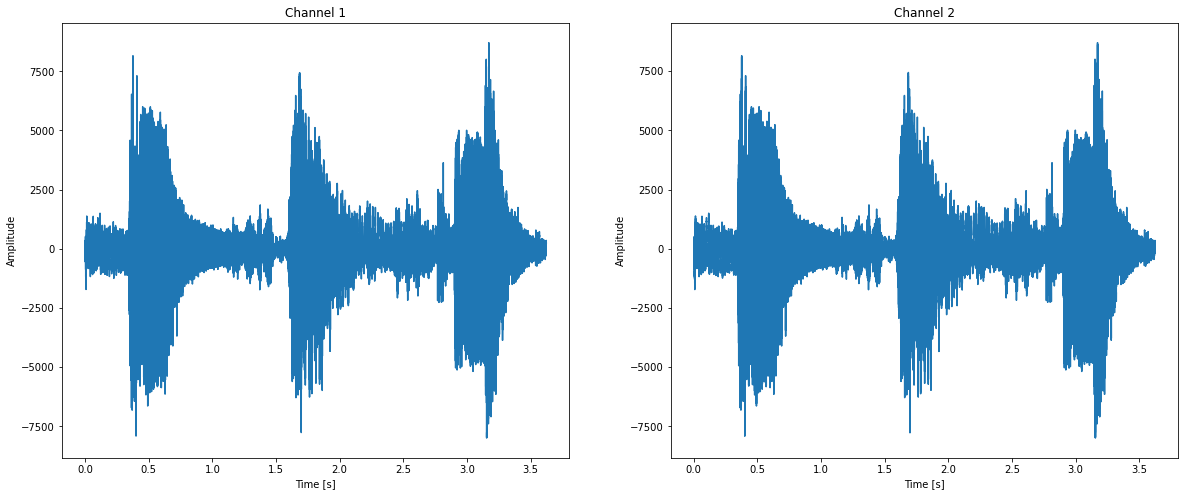

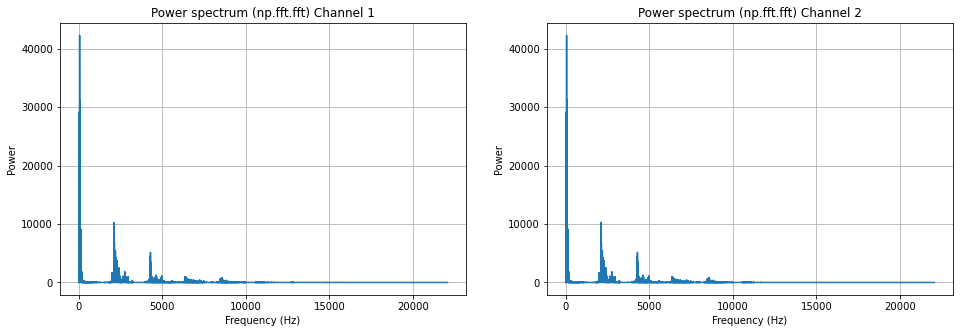

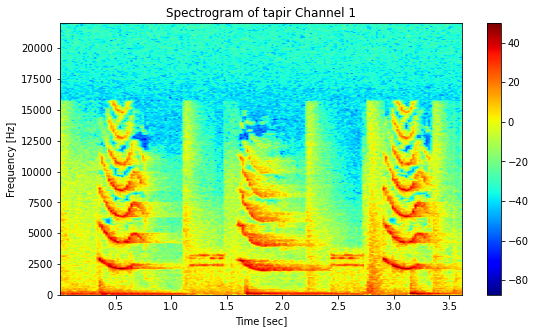

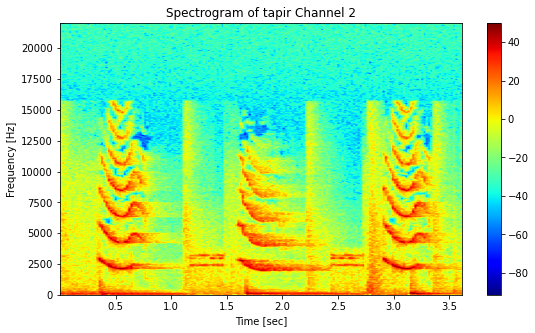

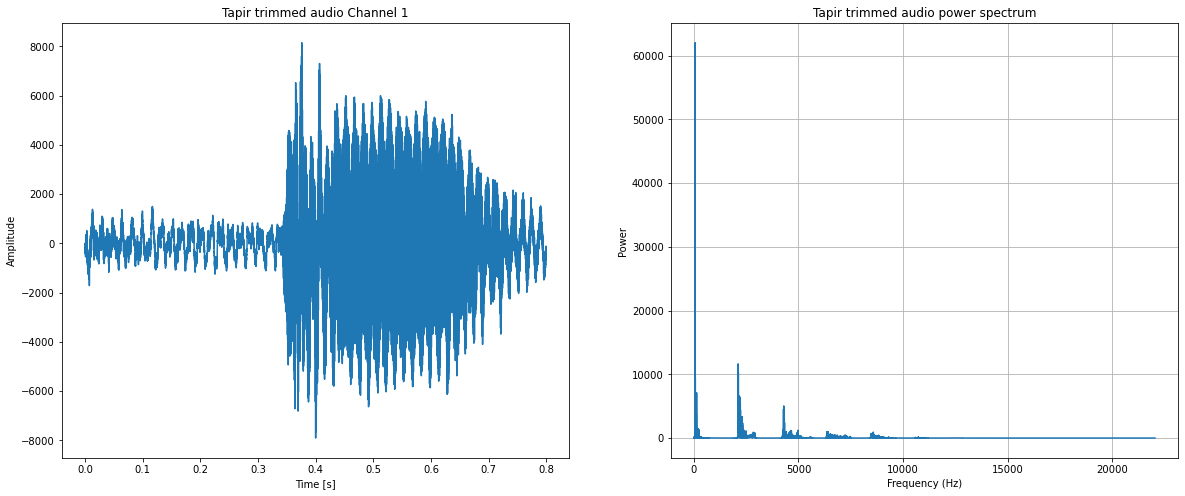

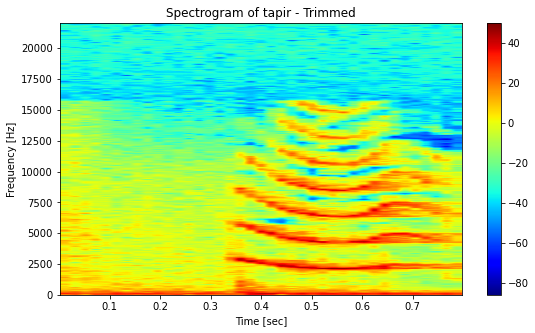

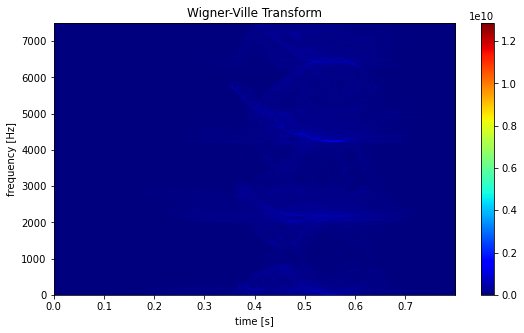

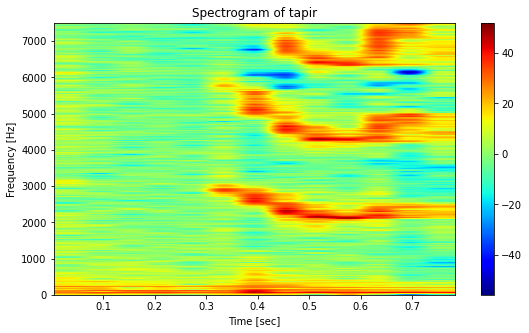

In [13]:
audio_file_path = r'D:\FYP dataset new\Tapir\Process sound\zoo_center\Squeak\0001_Tapir.wav'
samplerate, data ,length= read_audio(audio_file_path)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2,1)
signal_show(data[:,0],samplerate)
plt.title("Channel 1")

plt.subplot(1, 2,2)
signal_show(data[:,1],samplerate)
plt.title("Channel 2")

############### second row ##################
# power spectrum
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
PSD(data[:,0],samplerate)
plt.title("Power spectrum (np.fft.fft) Channel 1")

plt.subplot(1, 2,2)
PSD(data[:,1],samplerate)
plt.title("Power spectrum (np.fft.fft) Channel 2")

############### third row ##################
#Spectrogram
#plt.figure(figsize=(16, 5))
#plt.subplot(1, 2,1)
spectrogram(data[:,0],samplerate)
plt.title('Spectrogram of tapir Channel 1')

#plt.subplot(1, 2,2)
spectrogram(data[:,1],samplerate)
plt.title('Spectrogram of tapir Channel 2')

# trim the audio signal to 1 second

new_data=signal_segmentation(data[:,0],0.8,samplerate)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2,1)
signal_show(new_data,samplerate)
plt.title("Tapir trimmed audio Channel 1")

plt.subplot(1, 2,2)
PSD(new_data,samplerate)
plt.title("Tapir trimmed audio power spectrum")
#second row
#plt.figure(figsize=(16, 5))

#plt.subplot(1, 2,1)
spectrogram(new_data,samplerate)
plt.title('Spectrogram of tapir - Trimmed')
new_samplerate = 15000


#plt.subplot(1, 2,2)
new_data= downsampling(new_data,samplerate,new_samplerate)

WVD(new_data,new_samplerate)
#plt.title('Tapir WVD')

spectrogram(new_data,new_samplerate)

(35281,)
(12000,)


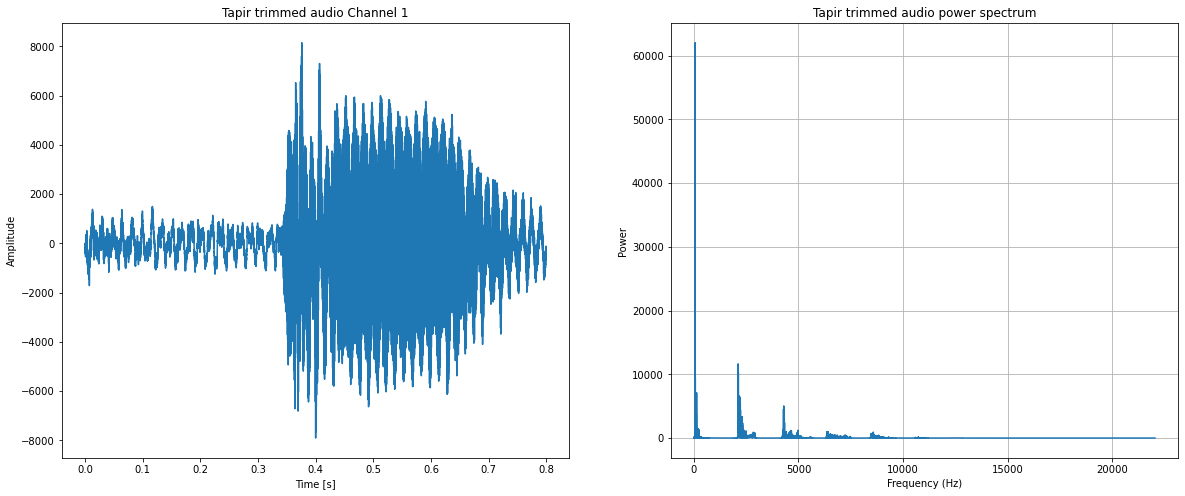

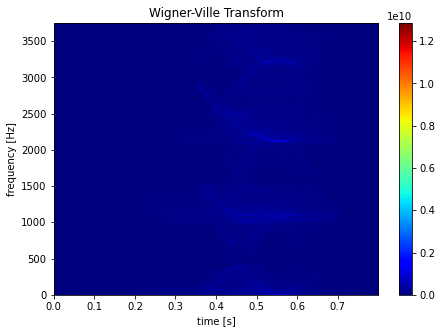

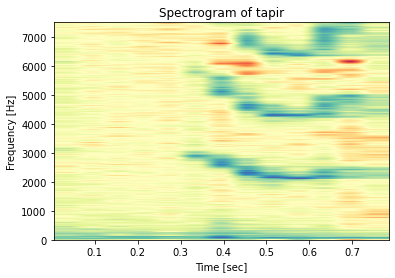

In [12]:
audio_file_path = r'D:\FYP dataset new\Tapir\Process sound\zoo_center\Squeak\0001_Tapir.wav'
samplerate, data ,length= read_audio(audio_file_path)

new_data=signal_segmentation(data[:,0],0.8,samplerate)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2,1)
signal_show(new_data,samplerate)
plt.title("Tapir trimmed audio Channel 1")

plt.subplot(1, 2,2)
PSD(new_data,samplerate)
plt.title("Tapir trimmed audio power spectrum")
#second row
plt.figure(figsize=(16, 5))

plt.subplot(1, 2,1)
spectrogram(new_data,samplerate)
plt.title('Spectrogram of tapir - Trimmed')
new_samplerate = 15000
print(new_data.shape)

#plt.subplot(1, 2,2)
new_data= downsampling(new_data,samplerate,new_samplerate)
print(new_data.shape)
WVD2(new_data,new_samplerate)
#plt.title('Tapir WVD')

spectrogram(new_data,new_samplerate)

## Tapir audio analysis plot

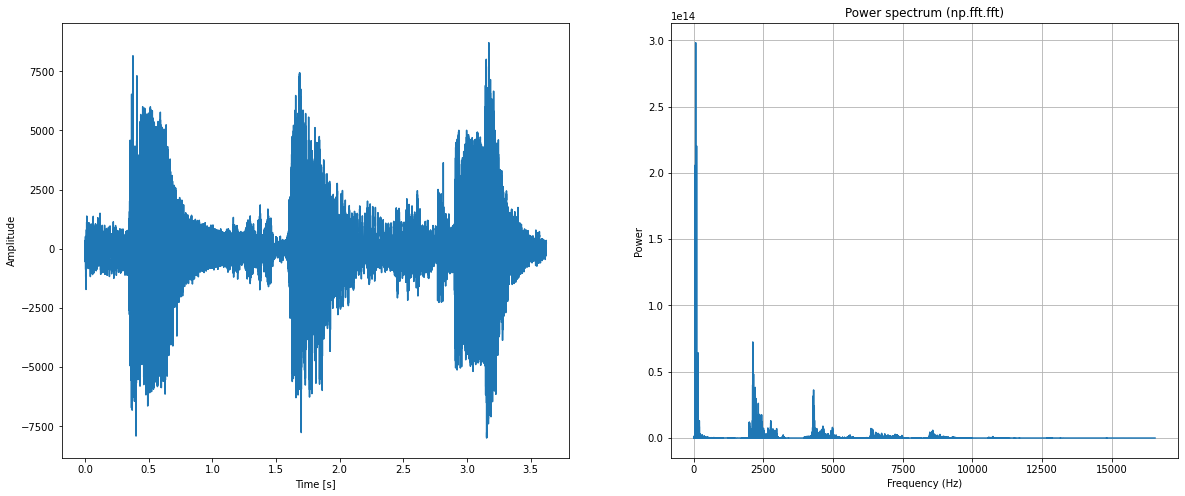

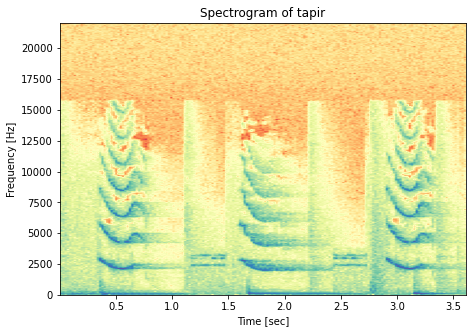

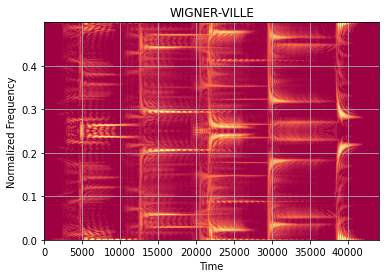

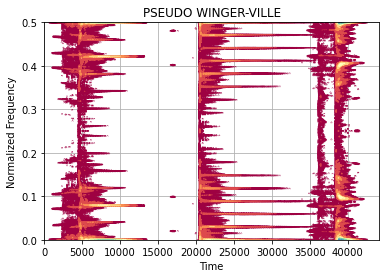

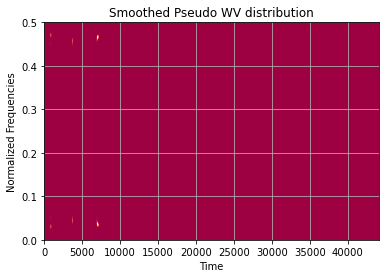

In [17]:
audio_file_path = r'D:\FYP dataset new\Tapir\Process sound\zoo_center\Squeak\0001_Tapir.wav'
samplerate, data ,length= read_audio(audio_file_path)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2,1)
signal_show(data,samplerate)

plt.subplot(1, 2,2)
#dft(data,samplerate)
PSD(data,samplerate)

#second row
plt.figure(figsize=(16, 5))

plt.subplot(1, 2,1)
spectrogram(data,samplerate)


WVD(data,1000,samplerate)

PWVD(data,3000,samplerate)

SPWVD(data,8000,samplerate)



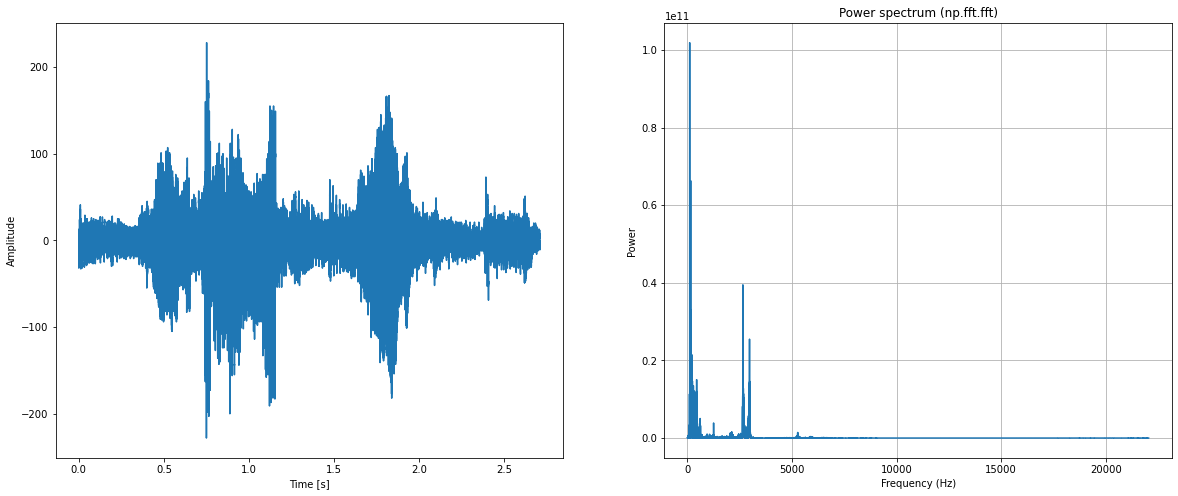

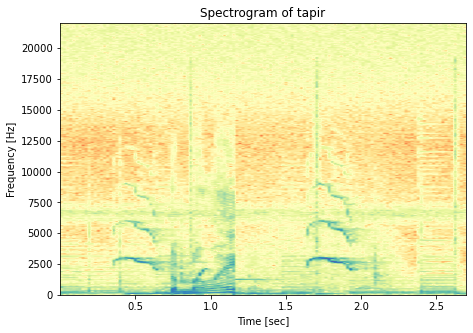

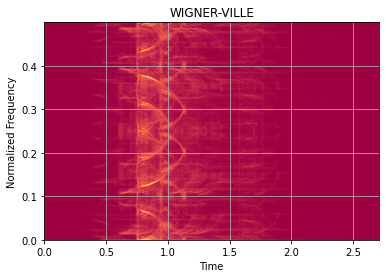

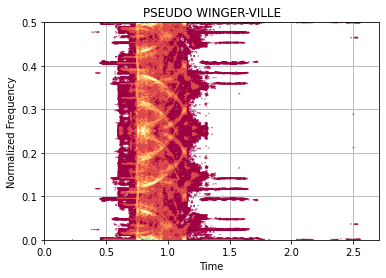

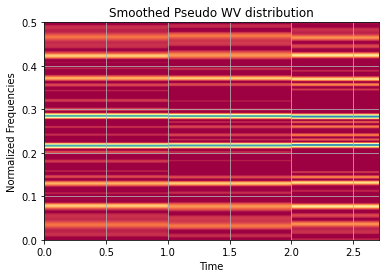

In [21]:
audio_file_path = r'D:\FYP dataset new\Tapir\Process sound\zoo_center\Squeak\0005_Tapir.wav'
samplerate, data,length = read_audio(audio_file_path)
length = data.shape[0] / samplerate
plt.figure(figsize=(20, 8))

plt.subplot(1, 2,1)
signal_show(data,samplerate)

plt.subplot(1, 2,2)
PSD(data,samplerate)

#second row
plt.figure(figsize=(16, 5))

plt.subplot(1, 2,1)
spectrogram(data,samplerate)


WVD(data,3000,length)

PWVD(data,3000,length)

SPWVD(data,3000,length)

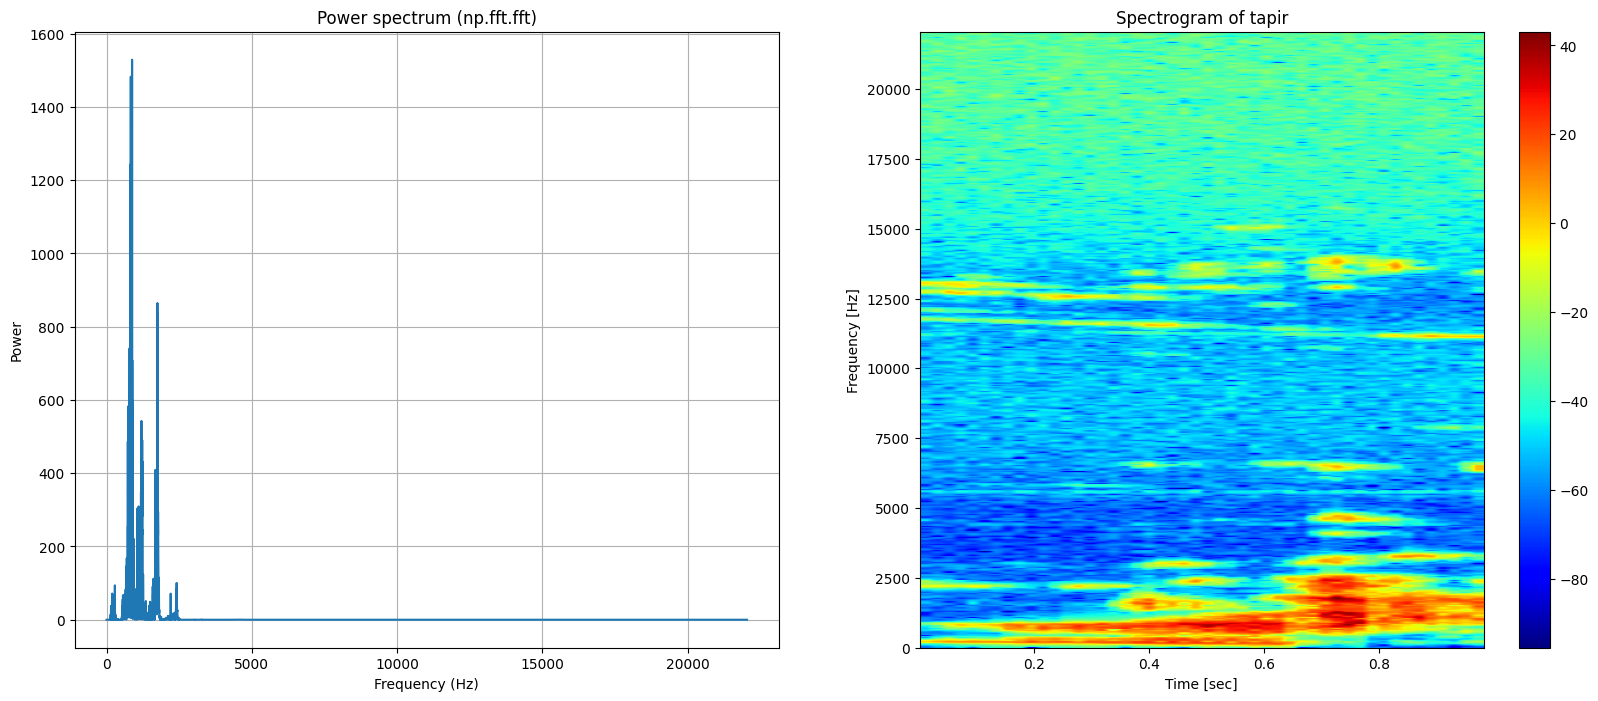

In [28]:
audio_file_path = 'Augmentation Sound/Sun Bear/zoo_1_1_ch0.wav'
samplerate, data,length = read_audio(audio_file_path)
length = data.shape[0] / samplerate
plt.figure(figsize=(20, 8))

plt.subplot(1, 2,1)
PSD(data,samplerate)

plt.subplot(1, 2,2)
spectrogram(data,samplerate)

